In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
from iminuit import Minuit

In [2]:
#Daten einlesen
with open('3_3DHHPWinkel0Frequenz8823M1.txt') as data:
    zeitw0m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M1.txt') as data:
    empfaengerw0m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M1.txt') as data:
    eingansw0m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel0Frequenz8823M2.txt') as data:
    zeitw0m2 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M2.txt') as data:
    empfaengerw0m2 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M2.txt') as data:
    eingansw0m2 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel0Frequenz8823M3.txt') as data:
    zeitw0m3 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M3.txt') as data:
    empfaengerw0m3 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M3.txt') as data:
    eingansw0m3 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel0Frequenz8823M4.txt') as data:
    zeitw0m4 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M4.txt') as data:
    empfaengerw0m4 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M4.txt') as data:
    eingansw0m4 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel30Frequenz8824M1.txt') as data:
    zeitw30m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel30Frequenz8824M1.txt') as data:
    empfaengerw30m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel30Frequenz8824M1.txt') as data:
    eingansw30m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel60Frequenz8822M1.txt') as data:
    zeitw60m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel60Frequenz8822M1.txt') as data:
    empfaengerw60m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel60Frequenz8822M1.txt') as data:
    eingansw60m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel90Frequenz8824M1.txt') as data:
    zeitw90m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel90Frequenz8824M1.txt') as data:
    empfaengerw90m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel90Frequenz8824M1.txt') as data:
    eingansw90m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel120Frequenz8822M1.txt') as data:
    zeitw120m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel120Frequenz8822M1.txt') as data:
    empfaengerw120m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel120Frequenz8822M1.txt') as data:
    eingansw120m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel150Frequenz8823M1.txt') as data:
    zeitw150m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel150Frequenz8823M1.txt') as data:
    empfaengerw150m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel150Frequenz8823M1.txt') as data:
    eingansw150m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel180Frequenz8822M1.txt') as data:
    zeitw180m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel180Frequenz8822M1.txt') as data:
    empfaengerw180m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel180Frequenz8822M1.txt') as data:
    eingansw180m1 = np.loadtxt(data, usecols= 2)

with open('Frequenzen.txt') as data:
    frequenzen = 10**6*np.loadtxt(data, usecols= 0)

In [3]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Linearfit 
def line(x, a, b):
    return a + x * b

def calculate_g(nu, B):
    h = 6.62607015*10**(-34)
    mub = 9.2741*10**(-24)
    g=h*nu/(mub*B)
    return g

def calculate_delta_g(nu, deltanu, B, deltaB):
    h = 6.62607015*10**(-34)
    mub = 9.2741*10**(-24)
    delta_g = np.sqrt((h/(mub*B)*deltanu)**2+((h*nu/(2*mub*B**2)*deltaB))**2)
    return delta_g
    
magnetfeld_aufsteigend = []
magnetfeld_aufsteigend_fehler = []
magnetfeld_absteigend = []
magnetfeld_absteigend_fehler = []

In [4]:
#Nulldurchgang automatisch finden Aufsteigend 
def plotNulldurchgangAufsteigend(lst, empf):
    maximumarr = np.where(lst == max(lst))
    maximumidx = maximumarr[0][0]
    output_aufsteigend =  -0.26*lst[0:maximumidx]**2+lst[0:maximumidx] * 22.97 + 290.32
    output_aufsteigend_fehler =  lst[maximumidx:]**2 * 0.05 +lst[maximumidx:] * 0.08 + 0.29

    empf_aufsteigend = empf[0:maximumidx]

    #Magnetfeld fit aufsteigend
    fig, ax = plt.subplots(figsize=(12,6))
    #Name for axis
    ax.set_xlabel('Magnetfeld [mT]', fontsize=20)
    ax.set_ylabel('Empfängerspannung [V]', fontsize=20)
    
    #Algorithmus zum finden des Nulldurchgans
    max_empf = np.where(empf_aufsteigend == max(empf_aufsteigend))[0][0]
    
    min_empf = np.where(empf_aufsteigend == min(empf_aufsteigend))[0][0]
    ax.errorbar(output_aufsteigend[max_empf-1000:min_empf+1000], empf_aufsteigend[max_empf-1000:min_empf+1000], xerr=output_aufsteigend_fehler[max_empf-1000:min_empf+1000], yerr=0.02,markersize=2, fmt='.', color = "darkgreen",label = "Empfängersignal")

    suchliste = empf_aufsteigend
    suchliste[0:min_empf] = 20
    suchliste[max_empf:np.size(empf_aufsteigend)] = 20
    params, cov = optimize.curve_fit(line,output_aufsteigend[min_empf:max_empf], empf_aufsteigend[min_empf:max_empf])
    x_fit = np.linspace(output_aufsteigend[max_empf], output_aufsteigend[min_empf])
    y_fit = line(x_fit, params[0], params[1])
    
    ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Nulldurchgang")

    index=abs(y_fit).argmin()
    magnetfeld_nulldurchgang = x_fit[index]
    #y_error = line(magnetfeld_nulldurchgang, np.sqrt(cov[0]), np.sqrt(cov[1]))
    
    print("Nulldurchgang des Magnetfelds aufsteigend: ",magnetfeld_nulldurchgang)
    inspannung = (magnetfeld_nulldurchgang-288.8)/23.75
    magnetfeld_fehler = 0.27*inspannung+0.6
    print("Fehler Magnetfeld: ", magnetfeld_fehler)
    ax.vlines(magnetfeld_nulldurchgang,-0.5, 0.5, label="Nulldurchgang")
    #ax.plot(output_absteigend, suchliste,'.',markersize=2, color = "lightblue",label = "Empfängersignal mit aufsteigendem Magnetfeld")

    magnetfeld_aufsteigend.append(magnetfeld_nulldurchgang)
    magnetfeld_aufsteigend_fehler.append(magnetfeld_fehler)


    ax.legend(fontsize=15, loc="upper left")
    plt.show()


In [5]:
#Calibration 
def plotNulldurchgangAbsteigend(lst, empf):
    maximumarr = np.where(lst == max(lst))
    maximumidx = maximumarr[0][0]
    output_absteigend = -0.46*lst[maximumidx:]**2  + lst[maximumidx:] * 23.78 + 291.0
    output_absteigend_fehler = lst[maximumidx:]**2 * 0.07 + lst[maximumidx:] * 0.13 + 0.4
    empf_absteigend = empf[maximumidx:]

    #Magnetfeld fit aufsteigend
    fig, ax = plt.subplots(figsize=(12,6))
    #Name for axis
    ax.set_xlabel('Magnetfeld [mT]', fontsize=20)
    ax.set_ylabel('Empfängerspannung [V]', fontsize=20)
    
    
    #Plotten der unskalierten Kurven
    #ax.plot(output_absteigend, empf_absteigend,'.',markersize=2, color = "lightblue",label = "Empfängersignal mit aufsteigendem Magnetfeld")

    
    #Algorithmus zum finden des Nulldurchgans
    max_empf = np.where(empf_absteigend == max(empf_absteigend))[0][0]
    
    min_empf = np.where(empf_absteigend == min(empf_absteigend))[0][0]
    ax.errorbar(output_absteigend[max_empf-1000:min_empf+1000], empf_absteigend[max_empf-1000:min_empf+1000], xerr=output_absteigend_fehler[max_empf-1000:min_empf+1000], yerr=0.02,markersize=2, fmt='.', color = "darkgreen",label = "Empfängersignal")

    suchliste = empf_absteigend
    suchliste[0:max_empf] = 20
    suchliste[min_empf:np.size(empf_absteigend)] = 20
    params, cov = optimize.curve_fit(line,output_absteigend[max_empf:min_empf], empf_absteigend[max_empf:min_empf])
    x_fit = np.linspace(output_absteigend[max_empf], output_absteigend[min_empf])
    y_fit = line(x_fit, params[0], params[1])
    
    ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Nulldurchgang")

    index=abs(y_fit).argmin()
    magnetfeld_nulldurchgang = x_fit[index]
    inspannung = (magnetfeld_nulldurchgang-296.1)/22.2
    magnetfeld_fehler = 0.3*inspannung+0.8
    print("Nulldurchgang des Magnetfelds absteigend: ",magnetfeld_nulldurchgang)
    print("Fehler Magnetfeld: ", magnetfeld_fehler)
    ax.vlines(magnetfeld_nulldurchgang,-0.5, 0.5, label="Nulldurchgang")
    #ax.plot(output_absteigend, suchliste,'.',markersize=2, color = "lightblue",label = "Empfängersignal mit aufsteigendem Magnetfeld")

    magnetfeld_absteigend.append(magnetfeld_nulldurchgang)
    magnetfeld_absteigend_fehler.append(magnetfeld_fehler)


    ax.legend(fontsize=15, loc="upper left")
    plt.show()


Nulldurchgang des Magnetfelds aufsteigend:  336.7798032955737
Fehler Magnetfeld:  1.1454546058865218


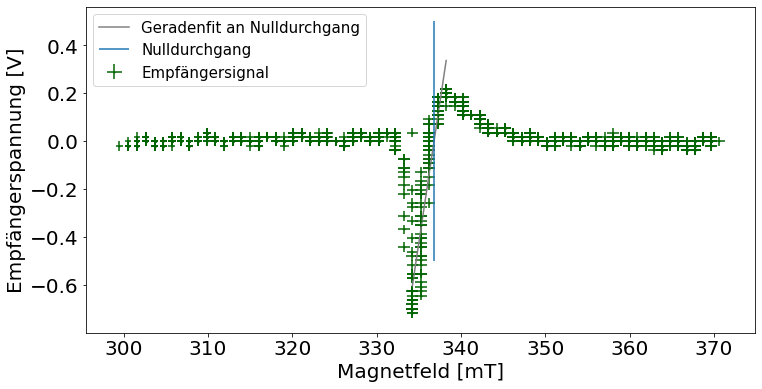

Nulldurchgang des Magnetfelds absteigend:  309.757965364842
Fehler Magnetfeld:  0.9845670995248915


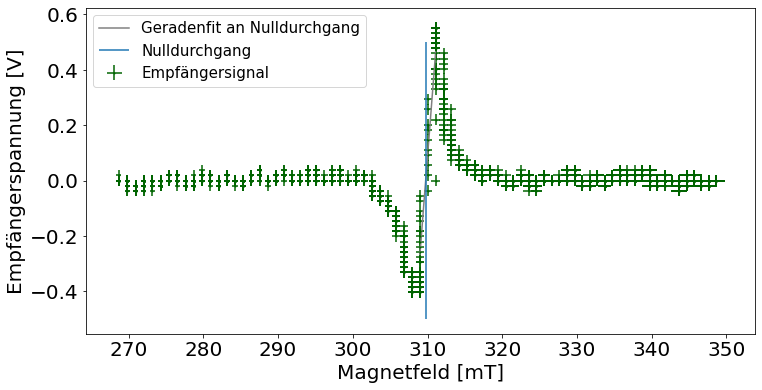

In [6]:

plotNulldurchgangAufsteigend(eingansw0m1,empfaengerw0m1)
plotNulldurchgangAbsteigend(eingansw0m1,empfaengerw0m1)

Nulldurchgang des Magnetfelds aufsteigend:  336.33261446095355
Fehler Magnetfeld:  1.1403707749245244


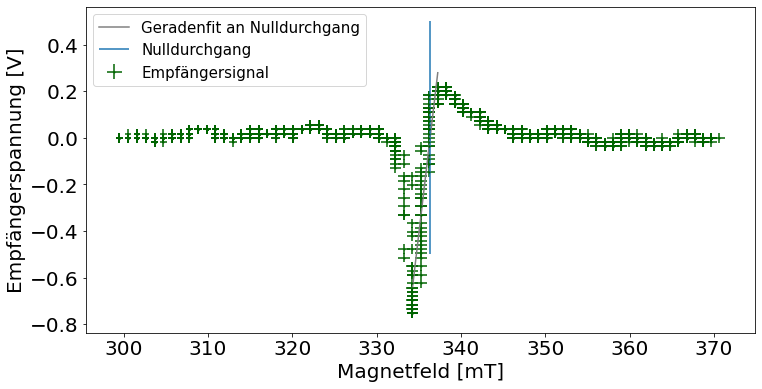

Nulldurchgang des Magnetfelds absteigend:  309.62907775035796
Fehler Magnetfeld:  0.9828253750048371


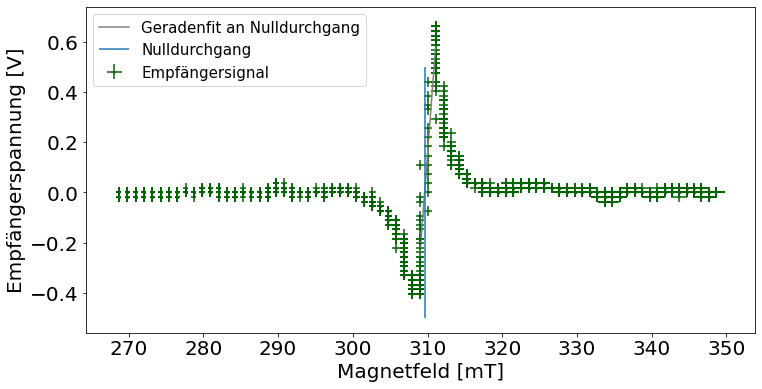

In [7]:
plotNulldurchgangAufsteigend(eingansw0m2,empfaengerw0m2)
plotNulldurchgangAbsteigend(eingansw0m2,empfaengerw0m2)

Nulldurchgang des Magnetfelds aufsteigend:  336.025833772266
Fehler Magnetfeld:  1.1368831628847085


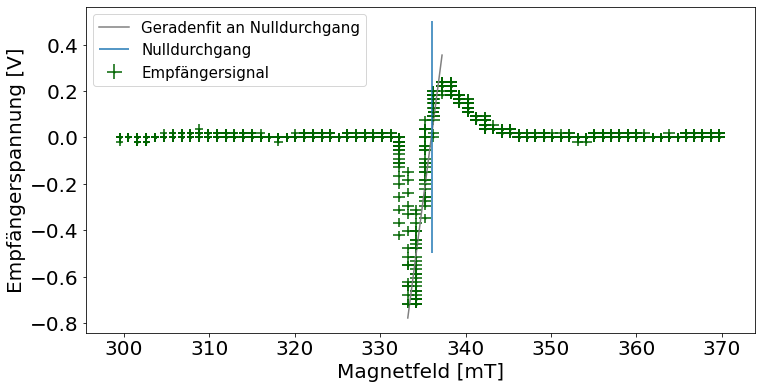

Nulldurchgang des Magnetfelds absteigend:  309.22027299212067
Fehler Magnetfeld:  0.9773009863800088


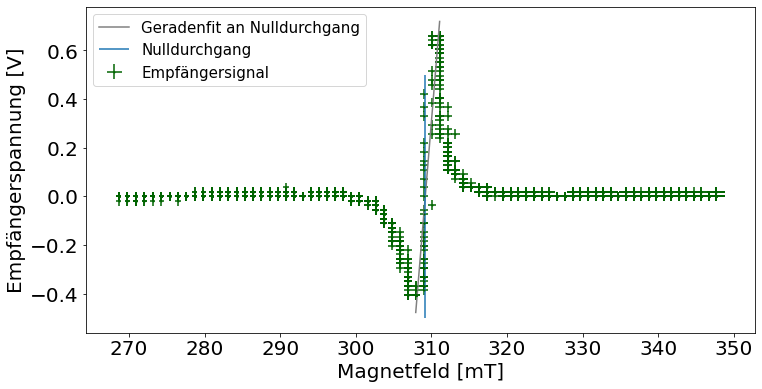

In [8]:
plotNulldurchgangAufsteigend(eingansw0m3,empfaengerw0m3)
plotNulldurchgangAbsteigend(eingansw0m3,empfaengerw0m3)

Nulldurchgang des Magnetfelds aufsteigend:  336.1485337343852
Fehler Magnetfeld:  1.1382780677172208


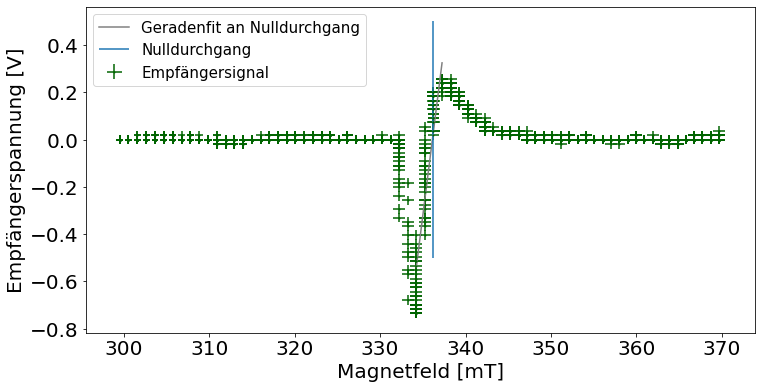

Nulldurchgang des Magnetfelds absteigend:  309.2424149069058
Fehler Magnetfeld:  0.977600201444673


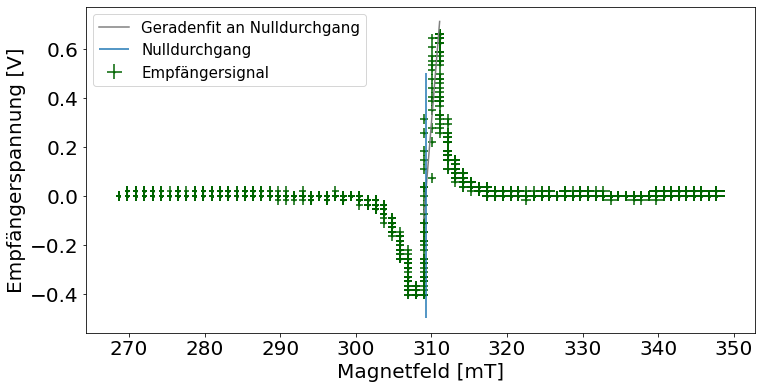

In [9]:
plotNulldurchgangAufsteigend(eingansw0m4,empfaengerw0m4)
plotNulldurchgangAbsteigend(eingansw0m4,empfaengerw0m4)

Nulldurchgang des Magnetfelds aufsteigend:  335.7803969079602
Fehler Magnetfeld:  1.1340929332694423


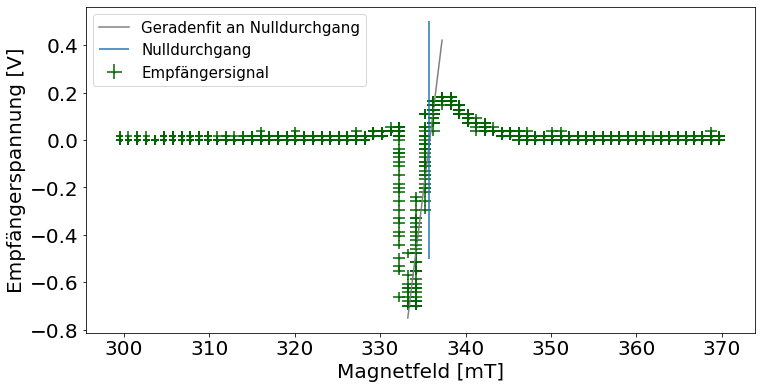

Nulldurchgang des Magnetfelds absteigend:  309.15580640399224
Fehler Magnetfeld:  0.9764298162701652


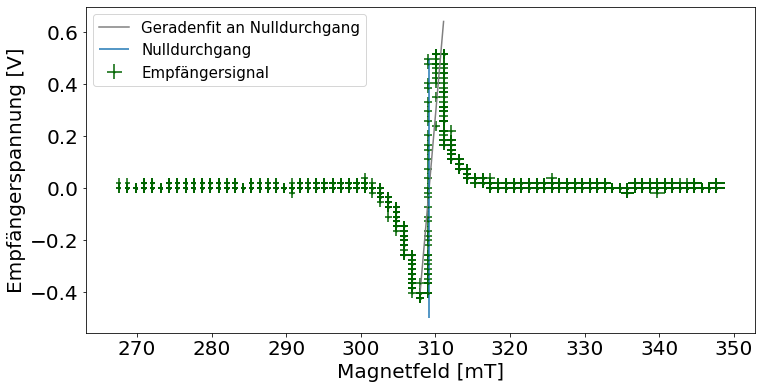

In [10]:
plotNulldurchgangAufsteigend(eingansw30m1,empfaengerw30m1)
plotNulldurchgangAbsteigend(eingansw30m1,empfaengerw30m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.33039695850454
Fehler Magnetfeld:  1.1289771443703671


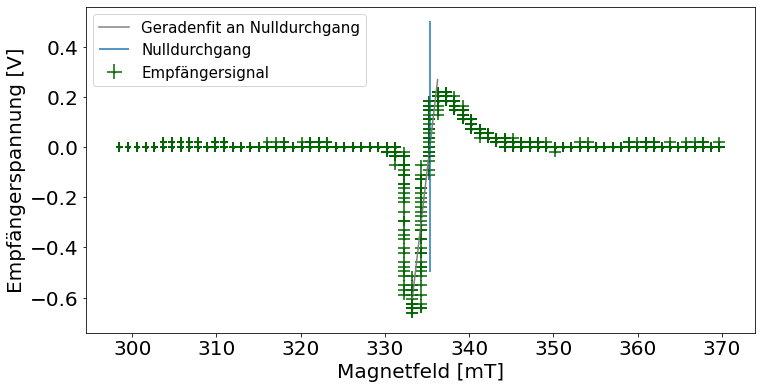

Nulldurchgang des Magnetfelds absteigend:  308.4474301470025
Fehler Magnetfeld:  0.9668571641486818


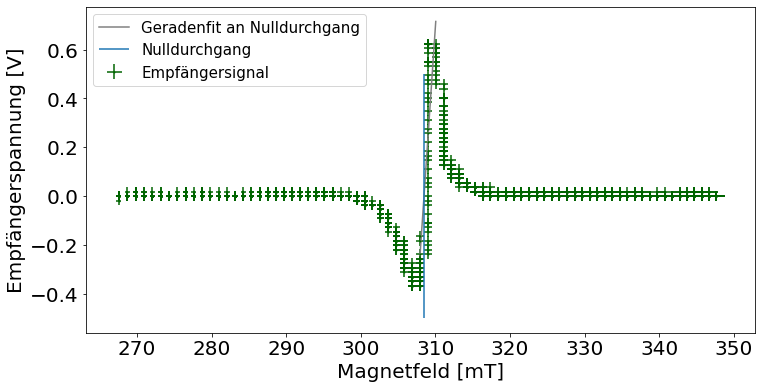

In [11]:
plotNulldurchgangAufsteigend(eingansw60m1,empfaengerw60m1)
plotNulldurchgangAbsteigend(eingansw60m1,empfaengerw60m1)

Nulldurchgang des Magnetfelds aufsteigend:  336.207314824481
Fehler Magnetfeld:  1.1389463158993627


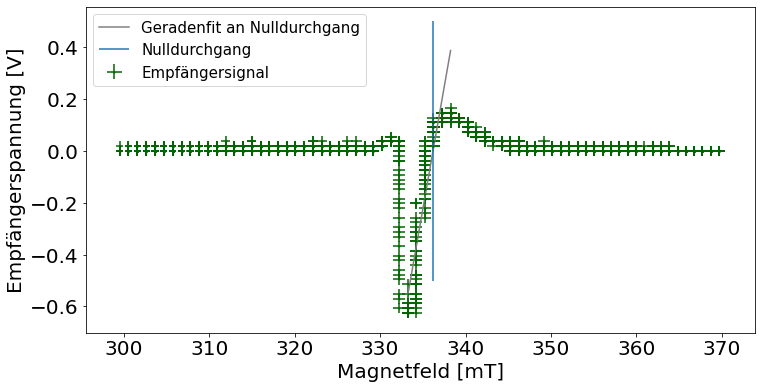

Nulldurchgang des Magnetfelds absteigend:  308.9208783213312
Fehler Magnetfeld:  0.9732551124504214


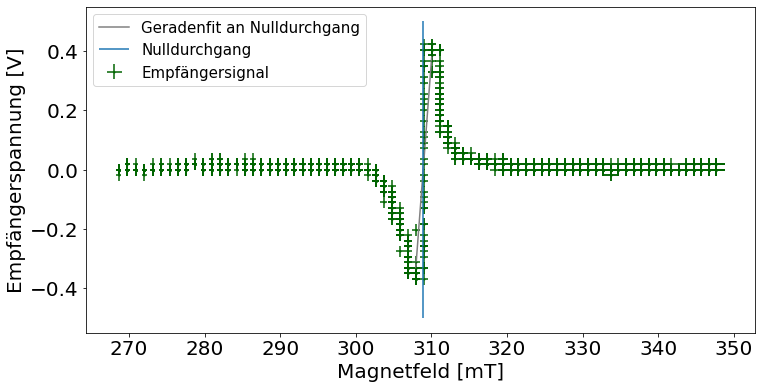

In [12]:
plotNulldurchgangAufsteigend(eingansw90m1,empfaengerw90m1)
plotNulldurchgangAbsteigend(eingansw90m1,empfaengerw90m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.08496390183336
Fehler Magnetfeld:  1.1261869580418948


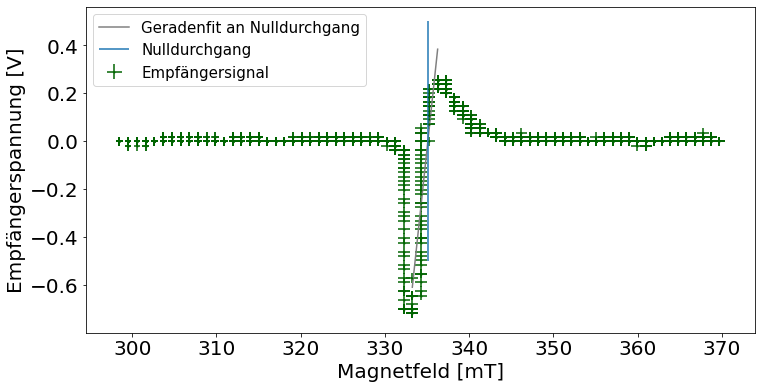

Nulldurchgang des Magnetfelds absteigend:  308.7265910783333
Fehler Magnetfeld:  0.9706296091666657


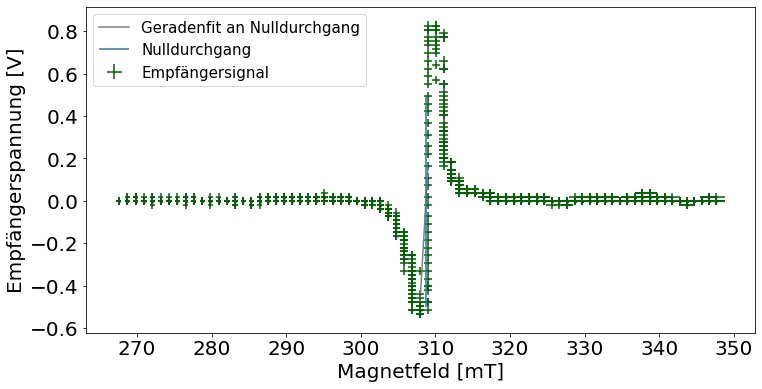

In [13]:
plotNulldurchgangAufsteigend(eingansw120m1,empfaengerw120m1)
plotNulldurchgangAbsteigend(eingansw120m1,empfaengerw120m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.5144717510079
Fehler Magnetfeld:  1.131069784116721


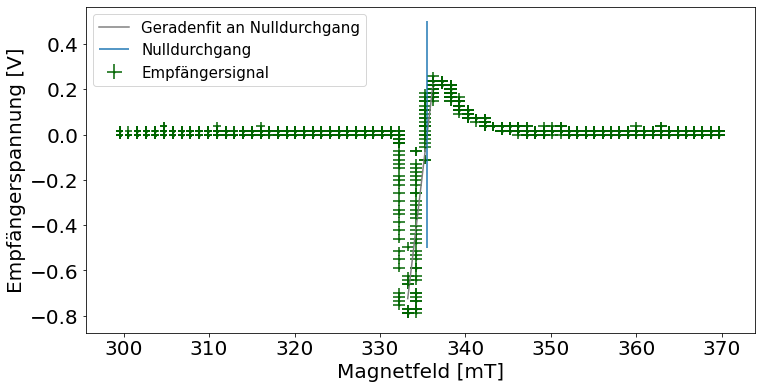

Nulldurchgang des Magnetfelds absteigend:  308.8347968350896
Fehler Magnetfeld:  0.9720918491228323


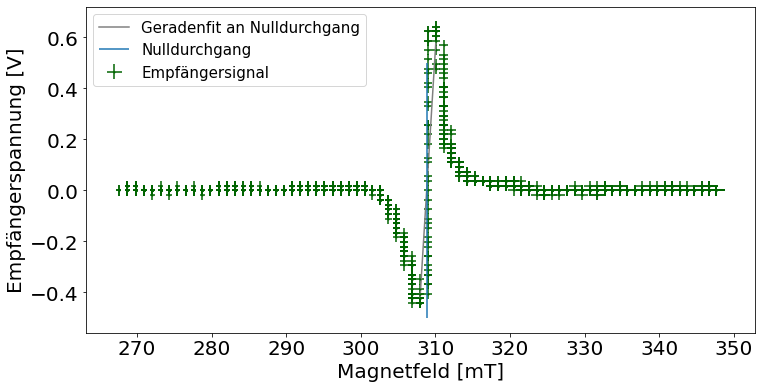

In [14]:
plotNulldurchgangAufsteigend(eingansw150m1,empfaengerw150m1)
plotNulldurchgangAbsteigend(eingansw150m1,empfaengerw150m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.6167723317563
Fehler Magnetfeld:  1.1322327801925978


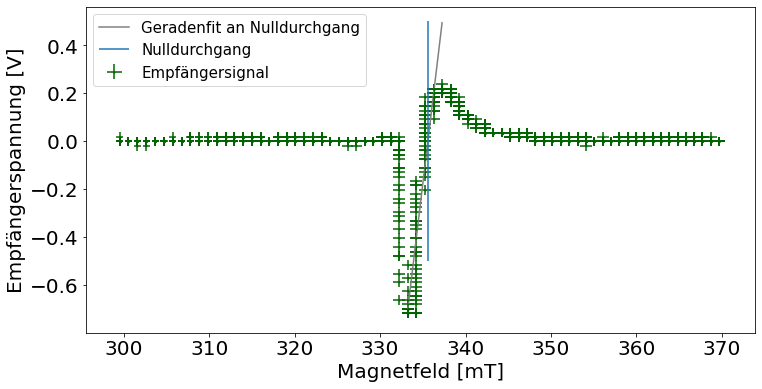

Nulldurchgang des Magnetfelds absteigend:  309.05000055069354
Fehler Magnetfeld:  0.9750000074418044


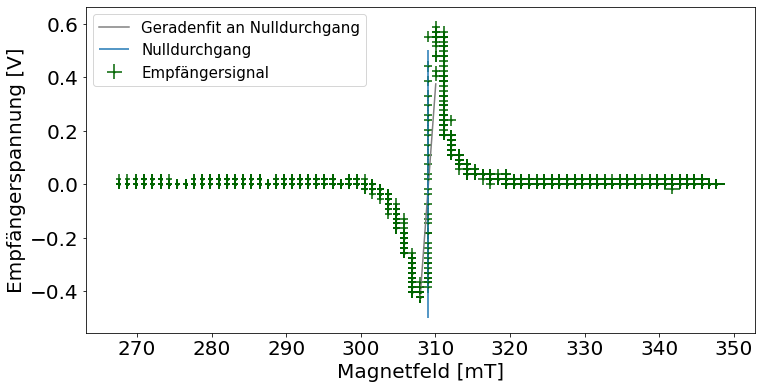

In [15]:
plotNulldurchgangAufsteigend(eingansw180m1,empfaengerw180m1)
plotNulldurchgangAbsteigend(eingansw180m1,empfaengerw180m1)

In [16]:
#Calculations of g_values aufsteigend und absteigend
magnetfeld_aufsteigend = 10**(-3)*np.array(magnetfeld_aufsteigend)
magnetfeld_absteigend = 10**(-3)*np.array(magnetfeld_absteigend)
magnetfeld_aufsteigend_fehler = 10**(-3)*np.array(magnetfeld_aufsteigend_fehler)
magnetfeld_absteigend_fehler = 10**(-3)*np.array(magnetfeld_absteigend_fehler)
g_values_aufsteigend = calculate_g(frequenzen, magnetfeld_aufsteigend)
g_values_absteigend = calculate_g(frequenzen, magnetfeld_absteigend)
frequenzen_errors = np.full([1,1],1*10**6)
delta_g_values_aufsteigend = calculate_delta_g(frequenzen, frequenzen_errors, magnetfeld_aufsteigend, magnetfeld_aufsteigend_fehler)
delta_g_values_absteigend = calculate_delta_g(frequenzen, frequenzen_errors, magnetfeld_absteigend, magnetfeld_absteigend_fehler)
print("g-Faktoren B aufsteigend:")
print(g_values_aufsteigend)
print("Fehler: ")
print(delta_g_values_aufsteigend)
print("g-Faktoren B absteigend:")
print(g_values_absteigend)
print("Fehler")
print(delta_g_values_absteigend)

g-Faktoren B aufsteigend:
[1.87177868 1.8742674  1.87597854 1.87529378 1.87756256 1.87965604
 1.87517842 1.8810328  1.87883775 1.87805217]
Fehler: 
[[0.00319021 0.00318454 0.00318063 0.0031822  0.00317785 0.00317134
  0.00318331 0.00316816 0.00317407 0.00317503]]
g-Faktoren B absteigend:
[2.0350639  2.03591103 2.03860261 2.03845664 2.03925881 2.04347887
 2.04080962 2.04163109 2.04114711 2.0394946 ]
Fehler
[[0.00324244 0.00323943 0.00322981 0.00323033 0.00322865 0.0032111
  0.00322309 0.00321775 0.00322069 0.00322542]]
